# Examples for running FLORIS_loads_DR

In [1]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup floris and process input file

In [2]:
floris = Floris("Input_NREL5MW_SWF_5WT_8mps.json")
#floris = Floris("example_input.json")

## Calculate Wake

In [3]:
import time

t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  0.024688243865966797 s


## Compute Velocities at each Turbine

In [4]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tpow_scale -", turbine.pow_scale)
    print("\tyaw_angle - ", turbine.yaw_angle)
    print("\tai -", turbine.aI)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.48390057]
	Ct - [0.76293975]
	power - [1685420.18637547]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.25655583]
	average velocity - 7.85065163365446
(806.0, 0.0):
	Cp - [0.47908381]
	Ct - [0.73097301]
	power - [935361.30463895]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.24066094]
	average velocity - 6.47308024284217
(1612.0, 0.0):
	Cp - [0.47624763]
	Ct - [0.72254242]
	power - [842216.02423978]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.23662879]
	average velocity - 6.263040872579965
(2418.0, 0.0):
	Cp - [0.4751698]
	Ct - [0.71933856]
	power - [808589.0224308]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.23511255]
	average velocity - 6.183219890544633
(3224.0, 0.0):
	Cp - [0.47467329]
	Ct - [0.71786268]
	power - [793419.30510157]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.234417]
	average velocity - 6.146449867299989


## Visualization Manager for FLORIS 

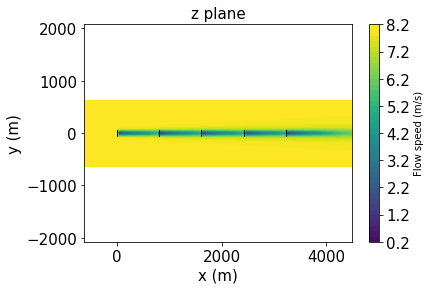

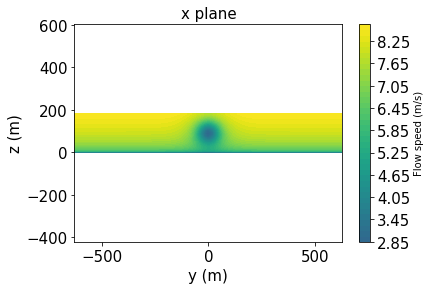

In [5]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
grid_resolution = (100, 100, 50)
visualization_manager = VisualizationManager(ff_viz, grid_resolution)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Test Power Scale and Yaw Angle Adjusting

In [6]:
turbines    = [turbine for _, turbine in floris.farm.flow_field.turbine_map.items()]
turbines[0].pow_scale = 0.9
turbines[0].yaw_angle = 10 * np.pi / 180 # degree to rad
floris.farm.flow_field.calculate_wake()

In [7]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tpow_scale -",turbine.pow_scale)
    print("\tai -", turbine.aI)
    print("\tyaw_angle -", turbine.yaw_angle * 180 / np.pi) # rad to degree
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.43551052]
	Ct - [0.59985468]
	power - [1473843.75094074]
	pow_scale - 0.9
	ai - [0.18291229]
	yaw_angle - 10.0
	average velocity - 7.85065163365446
(806.0, 0.0):
	Cp - [0.48167276]
	Ct - [0.74589853]
	power - [1105166.93965402]
	pow_scale - 1.0
	ai - [0.24795761]
	yaw_angle - 0.0
	average velocity - 6.830937101876448
(1612.0, 0.0):
	Cp - [0.47735752]
	Ct - [0.7258416]
	power - [877853.74403759]
	pow_scale - 1.0
	ai - [0.23819931]
	yaw_angle - 0.0
	average velocity - 6.3452365804390265
(2418.0, 0.0):
	Cp - [0.47565108]
	Ct - [0.72076917]
	power - [823485.99794727]
	pow_scale - 1.0
	ai - [0.23578852]
	yaw_angle - 0.0
	average velocity - 6.218862173347752
(3224.0, 0.0):
	Cp - [0.47489922]
	Ct - [0.71853427]
	power - [800297.27343216]
	pow_scale - 1.0
	ai - [0.23473328]
	yaw_angle - 0.0
	average velocity - 6.1631818229575845


## Sweep Power Scale and Yaw Angle of turbine_0 

In [10]:
pow_scale_0 = np.arange(0.75,1.01,0.01)
yaw_angle_0 = np.arange(0,26,1)
pow_scale_1 = np.arange(0.75,1.01,0.01)
yaw_angle_1 = np.arange(0,26,1)

pow2_0 = np.zeros([26,26,26,26])
pow2_1 = np.zeros([26,26,26,26])
pow2_2 = np.zeros([26,26,26,26])
pow2_3 = np.zeros([26,26,26,26])
pow2_4 = np.zeros([26,26,26,26])

for p_idx_0, p0 in enumerate(pow_scale_0):
    turbines[0].pow_scale = p0
    for y_idx_0, y0 in enumerate(yaw_angle_0):
        turbines[0].yaw_angle = y0 * np.pi / 180  # degree to rad
        for p_idx_1, p1 in enumerate(pow_scale_1):
            turbines[1].pow_scale = p1
            for y_idx_1, y1 in enumerate(yaw_angle_1):
                turbines[1].yaw_angle = y1 * np.pi / 180  # degree to rad
                
                floris.farm.flow_field.calculate_wake()
                pow2_0[p_idx_0, y_idx_0, p_idx_1, y_idx_1] = turbines[0].power
                pow2_1[p_idx_0, y_idx_0, p_idx_1, y_idx_1] = turbines[1].power
                pow2_2[p_idx_0, y_idx_0, p_idx_1, y_idx_1] = turbines[2].power
                pow2_3[p_idx_0, y_idx_0, p_idx_1, y_idx_1] = turbines[3].power
                pow2_4[p_idx_0, y_idx_0, p_idx_1, y_idx_1] = turbines[4].power

pow2_t = pow2_0 + pow2_1 + pow2_2 + pow2_3 + pow2_4

In [12]:
pow2_t_max = np.max(pow2_t)
pow2_t_max_idx = np.where(pow2_t == np.max(pow2_t))
pow_scale_0_max = 0.75 + pow2_t_max_idx[0][0]*0.01
yaw_angle_0_max = 0 + pow2_t_max_idx[1][0]*1
pow_scale_1_max = 0.75 + pow2_t_max_idx[2][0]*0.01
yaw_angle_1_max = 0 + pow2_t_max_idx[3][0]*1

print('The orginal power of WF is',round(pow2_t[25,0,25,0]/1e6,2),'MW \
( pow_scale_0 = 1.0, yaw_angle_0 = 0, pow_scale_1 = 1.0, yaw_angle_1 = 0 )')

#print('The maximum power of WF is',round(pow2_t_max/1e6,2),'MW ( pow_scale =', round(pow_scale_0_max,2),\
#      ', yaw_angle =', round(yaw_angle_0_max,2),')')
print('The power of WF with largest yaw misalignment is', round(pow2_t[25,25,25,25]/1e6,2),'MW \
( pow_scale_0 =1.0, yaw_angle_0 = 25, pow_scale_1 =1.0, yaw_angle_1 = 25 )')

print('The power increase of WF is',round((pow2_t_max - pow2_t[25,0,25,0])/1e6,2),'MW')

print('The relative increase power is',round((pow2_t_max-pow2_t[25,0,25,0])/pow2_t[25,0,25,0],2),'%')

print('The corresponding power scale of Turb_0:',round(pow_scale_0_max,2))
print('The corresponding yaw angle of Turb_0:',round(yaw_angle_0_max,2))
print('The corresponding power scale of Turb_1:',round(pow_scale_0_max,2))
print('The corresponding yaw angle of Turb_1:',round(yaw_angle_0_max,2))

The orginal power of WF is 5.07 MW ( pow_scale_0 = 1.0, yaw_angle_0 = 0, pow_scale_1 = 1.0, yaw_angle_1 = 0 )
The power of WF with largest yaw misalignment is 5.5 MW ( pow_scale_0 =1.0, yaw_angle_0 = 25, pow_scale_1 =1.0, yaw_angle_1 = 25 )
The power increase of WF is 0.43 MW
The relative increase power is 0.09 %
The corresponding power scale of Turb_0: 1.0
The corresponding yaw angle of Turb_0: 25
The corresponding power scale of Turb_1: 1.0
The corresponding yaw angle of Turb_1: 25


In [15]:
np.savez('pow2_t_5WT_AI_Yaw_First2_case',pow2_t)

In [18]:
xx = np.load('pow2_t_5WT_AI_Yaw_First2_case.npy')